<a href="https://colab.research.google.com/github/Deyonrose/Speech_Processing/blob/main/2348513_SPR_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION 1

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the TIMIT speech signal
sample_rate, signal = wavfile.read('si1743.wav')

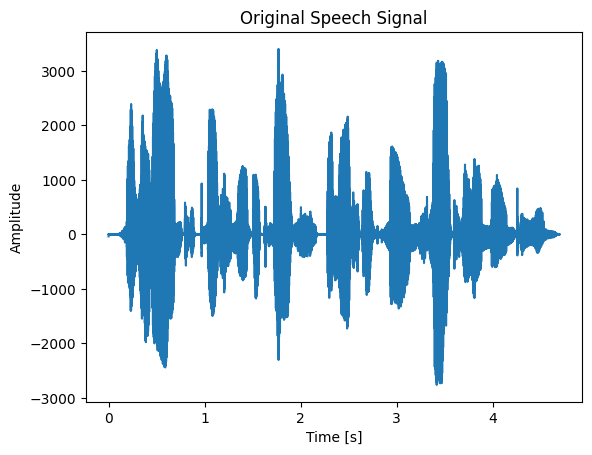

In [ ]:
# (a) Plot the original speech signal
time = np.linspace(0, len(signal) / sample_rate, num=len(signal))
plt.plot(time, signal)
plt.title('Original Speech Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# (b) Resample the signal at different sampling rates
sampling_rates = [8000, 16000, 44100]
resampled_signals = [resample(signal, int(len(signal) * sr / sample_rate)) for sr in sampling_rates]

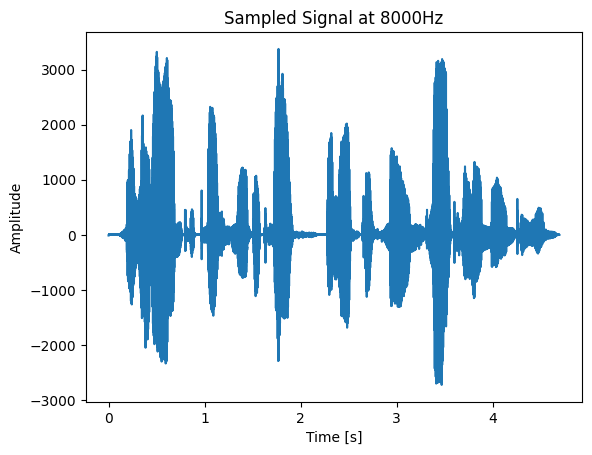

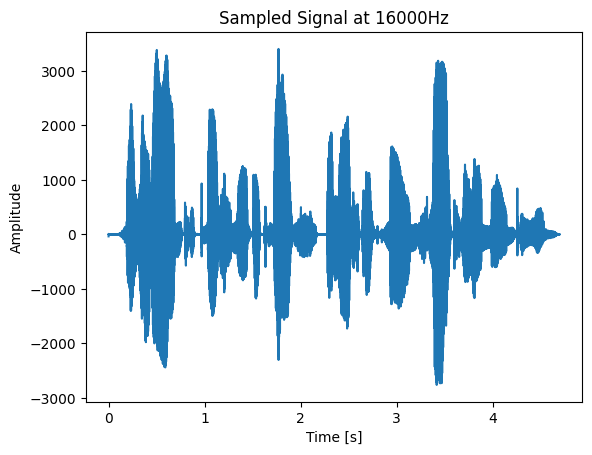

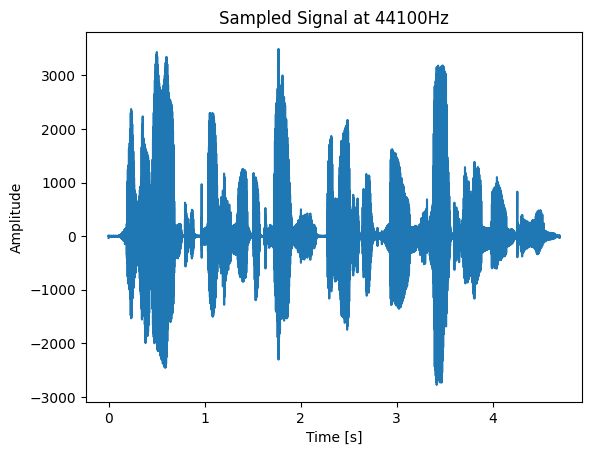

In [ ]:
# (c) Plot the resampled signals
for i, sr in enumerate(sampling_rates):
    time_resampled = np.linspace(0, len(resampled_signals[i]) / sr, num=len(resampled_signals[i]))
    plt.plot(time_resampled, resampled_signals[i])
    plt.title(f'Sampled Signal at {sr}Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.show()

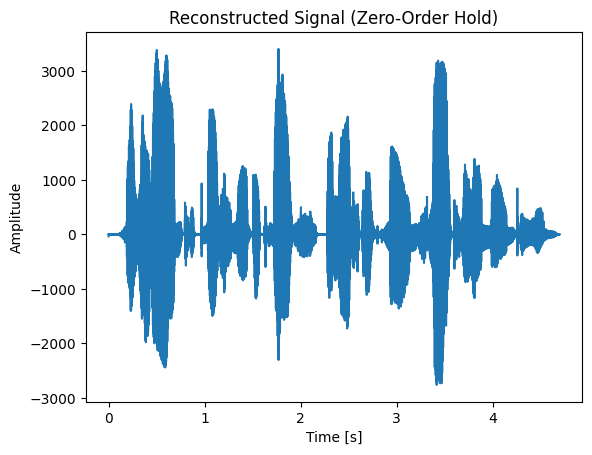

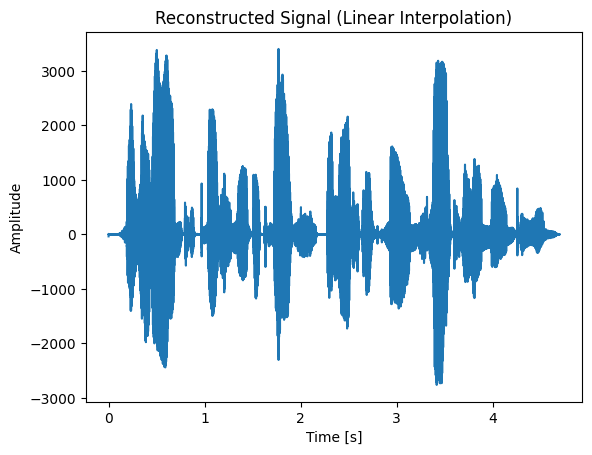

In [ ]:
# (d) Reconstruct the signal using Zero-order hold and Linear Interpolation
# Zero-order hold (Nearest-neighbor interpolation)
zero_order_reconstructed = np.repeat(resampled_signals[1], int(sample_rate / sampling_rates[1]))
time_zero_order = np.linspace(0, len(zero_order_reconstructed) / sample_rate, num=len(zero_order_reconstructed))

plt.plot(time_zero_order, zero_order_reconstructed)
plt.title('Reconstructed Signal (Zero-Order Hold)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Linear interpolation
time_resampled = np.linspace(0, len(resampled_signals[1]) / sampling_rates[1], num=len(resampled_signals[1]))  # time axis for resampled signal
linear_interpolated_reconstructed = np.interp(time, time_resampled, resampled_signals[1])

plt.plot(time, linear_interpolated_reconstructed)
plt.title('Reconstructed Signal (Linear Interpolation)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# (e) Compute MSE
mse_zero_order = mean_squared_error(signal[:len(zero_order_reconstructed)], zero_order_reconstructed)
mse_linear = mean_squared_error(signal[:len(linear_interpolated_reconstructed)], linear_interpolated_reconstructed)

print(f"MSE (Zero-Order Hold): {mse_zero_order}")
print(f"MSE (Linear Interpolation): {mse_linear}")


MSE (Zero-Order Hold): 1.1052182379247458e-25
MSE (Linear Interpolation): 1.1052182379247458e-25


# QUESTION 2

In [ ]:
import numpy as np

# Glottal pulse train (for voiced sounds)
def glottal_pulse_train(frequency, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration))
    pulse_train = np.sin(2 * np.pi * frequency * t)
    return pulse_train

# White noise (for unvoiced sounds)
def white_noise(duration, sample_rate):
    return np.random.normal(0, 1, int(sample_rate * duration))


In [ ]:
from scipy.signal import lfilter

# Example of a vocal tract filter with formant frequencies (FIR filter)
def vocal_tract_filter(signal, formants, sample_rate):
    # Create an FIR filter with formants (resonances)
    b = np.poly(formants)  # Filter coefficients
    filtered_signal = lfilter(b, 1, signal)  # Apply the filter
    return filtered_signal


In [ ]:
sample_rate = 16000  # Example sample rate
duration = 1.0  # 1 second of speech
formants = [500, 1500, 2500]  # Example formant frequencies

# Generate a glottal pulse train (voiced sound) and apply the vocal tract filter
source_signal = glottal_pulse_train(frequency=100, duration=duration, sample_rate=sample_rate)
filtered_signal = vocal_tract_filter(source_signal, formants=formants, sample_rate=sample_rate)


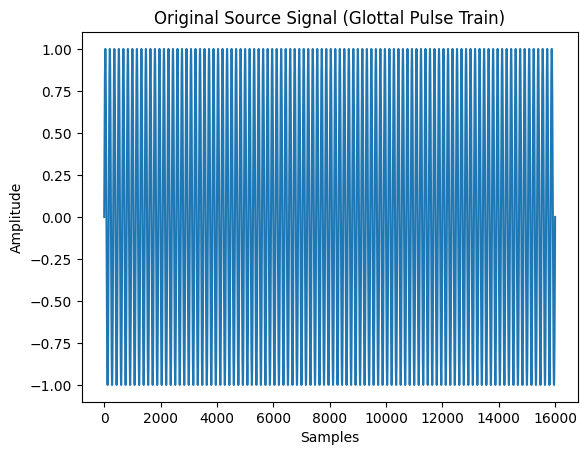

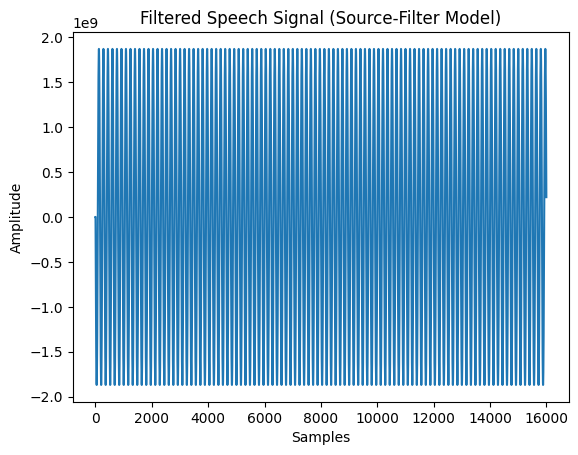

In [ ]:
import matplotlib.pyplot as plt

# Plot original source signal
plt.plot(source_signal)
plt.title('Original Source Signal (Glottal Pulse Train)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

# Plot filtered signal
plt.plot(filtered_signal)
plt.title('Filtered Speech Signal (Source-Filter Model)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


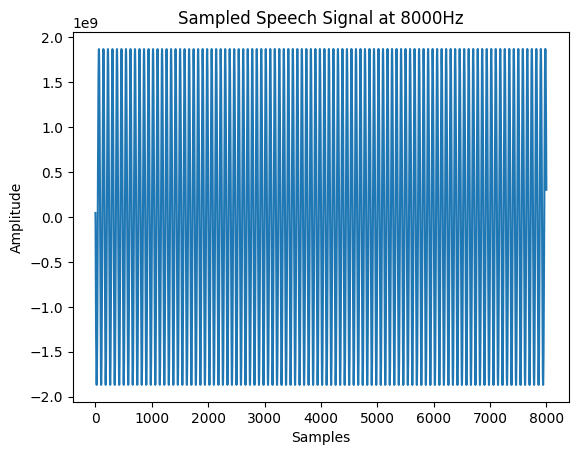

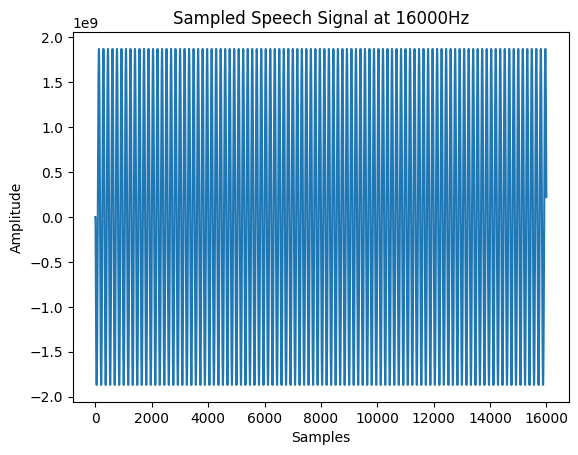

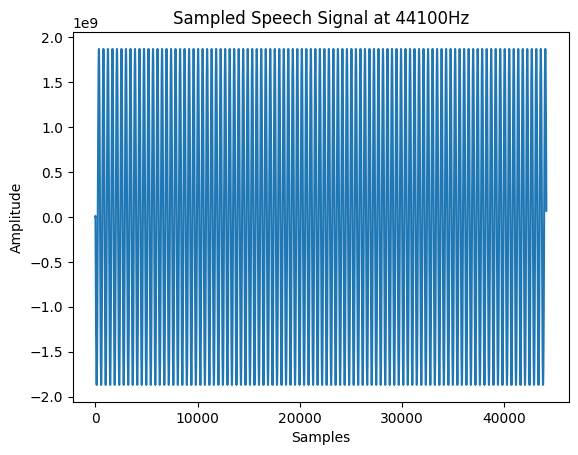

In [ ]:
from scipy.signal import resample

# Resample at different rates (e.g., 8kHz, 16kHz, 44.1kHz)
sampling_rates = [8000, 16000, 44100]
resampled_signals = [resample(filtered_signal, int(len(filtered_signal) * sr / sample_rate)) for sr in sampling_rates]

# Plot the resampled signals
for i, sr in enumerate(sampling_rates):
    plt.plot(resampled_signals[i])
    plt.title(f'Sampled Speech Signal at {sr}Hz')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()


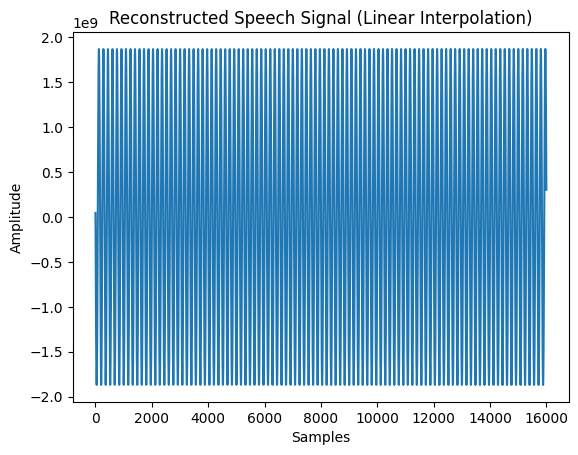

In [ ]:
# Linear interpolation for reconstruction
time_original = np.linspace(0, len(filtered_signal) / sample_rate, len(filtered_signal))
time_resampled = np.linspace(0, len(filtered_signal) / sample_rate, len(resampled_signals[0]))
reconstructed_signal = np.interp(time_original, time_resampled, resampled_signals[0])

plt.plot(reconstructed_signal)
plt.title('Reconstructed Speech Signal (Linear Interpolation)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(filtered_signal[:len(reconstructed_signal)], reconstructed_signal)
print(f'MSE between original and reconstructed signal: {mse}')


MSE between original and reconstructed signal: 898055972272290.5


**Inference**

Lower MSE will reconstruct the signal closer to the original.

Higher MSE means the reconstructed signal will have more distortion compared to  original

Lower sampling rates might bring aliasing and degrade the quality, while higher rates provide more accuracy.